In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
df = sns.load_dataset("healthexp")

In [3]:
df.head()

,Year,Country,Spending_USD,Life_Expectancy
0,1970,Germany,252.311,70.6
1,1970,France,192.143,72.2
2,1970,Great Britain,123.993,71.9
3,1970,Japan,150.437,72.0
4,1970,USA,326.961,70.9


In [4]:
df.shape

(274, 4)

In [5]:
max_lfexpt = df["Life_Expectancy"].max()

In [6]:
df[ df["Life_Expectancy"] == max_lfexpt]

,Year,Country,Spending_USD,Life_Expectancy
272,2020,Japan,4665.641,84.7


In [7]:
for col in df.columns:
    print(df[col].value_counts(),"\n")
    

Year
1995    6
2008    6
1998    6
1999    6
2000    6
2001    6
2002    6
2003    6
2004    6
2005    6
2006    6
2007    6
2009    6
1996    6
2010    6
2011    6
2012    6
2013    6
2014    6
2015    6
2016    6
2017    6
2018    6
2019    6
1997    6
2020    6
1985    6
1993    6
1992    6
1980    6
1990    6
1994    6
1971    5
1981    5
1982    5
1984    5
1983    5
1986    5
1987    5
1988    5
1989    5
1991    5
1970    5
1979    4
1976    4
1975    4
1978    3
1977    3
1974    3
1973    3
1972    3
Name: count, dtype: int64 

Country
Japan            51
USA              51
Germany          50
Canada           44
Great Britain    43
France           35
Name: count, dtype: int64 

Spending_USD
252.311      1
3264.574     1
3444.855     1
3567.061     1
3486.621     1
            ..
842.797      1
1166.430     1
2901.589     1
1897.456     1
11859.179    1
Name: count, Length: 274, dtype: int64 

Life_Expectancy
78.8    6
81.0    6
75.7    5
81.2    5
78.6    5
       ..
77.7  

In [8]:
max_spnd = df["Spending_USD"].max()
df[df["Spending_USD"] == max_spnd]

,Year,Country,Spending_USD,Life_Expectancy
273,2020,USA,11859.179,77.0


In [9]:
df.pivot_table("Spending_USD", "Country",aggfunc="mean")

,Spending_USD
Country,
Canada,2685.778341
France,3045.145057
Germany,2667.280200
Great Britain,2034.192465
Japan,1860.257902
USA,4388.570529


In [10]:
df.pivot_table("Life_Expectancy", "Country",aggfunc="mean")

,Life_Expectancy
Country,
Canada,78.706818
France,79.565714
Germany,76.726000
Great Britain,77.620930
Japan,79.554902
USA,75.843137


In [11]:
df.pivot_table("Life_Expectancy", "Year",aggfunc="mean")

,Life_Expectancy
Year,
1970,71.520000
1971,71.920000
1972,71.800000
1973,72.033333
1974,72.400000
1975,72.850000
1976,73.325000
1977,73.700000
1978,73.866667


In [12]:
df_yr_spnd = df.pivot_table("Spending_USD", "Year",aggfunc="mean")
df_yr_lfexp = df.pivot_table("Life_Expectancy", "Year",aggfunc="mean")

In [13]:
np.std(df_yr_spnd, axis = 0)

Spending_USD    1872.273639
dtype: float64

In [14]:
np.std(df_yr_lfexp, axis = 0)

Life_Expectancy    3.140219
dtype: float64

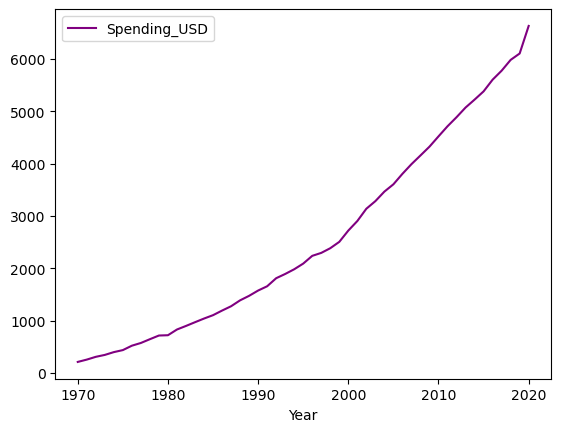

In [15]:
sns.lineplot(df_yr_spnd, palette = ["purple"])
plt.show()

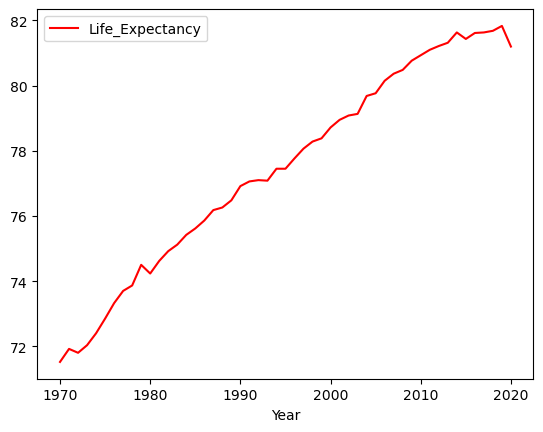

In [16]:
sns.lineplot(df_yr_lfexp, palette = ["red"])
plt.show()

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
lm = LinearRegression()

In [28]:
X = df["Year"].values
X = X.reshape(-1,1)
y = df["Life_Expectancy"].values

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =  0.3, random_state = 23 )

In [32]:
lm.fit(X_train, y_train)

LinearRegression()

In [34]:
lm.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [36]:
y_pred = lm.predict(X_test)

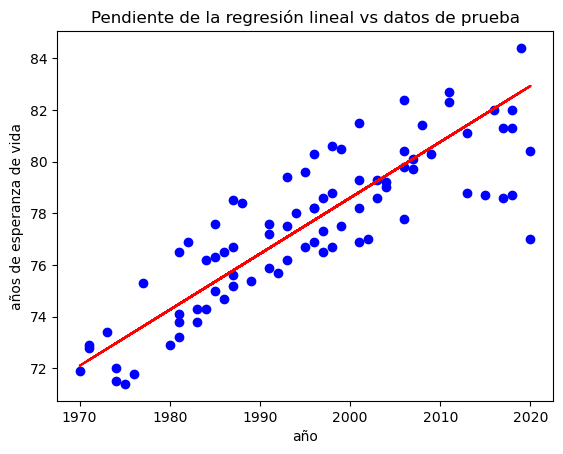

In [56]:
plt.scatter(X_test, y_test, color="b")
plt.plot(X_test, y_pred, color="r")
plt.xlabel("año")
plt.ylabel("años de esperanza de vida")
plt.title("Pendiente de la regresión lineal vs datos de prueba")
plt.show()

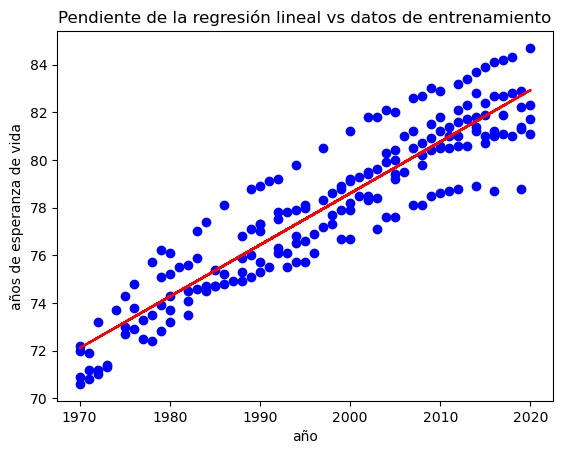

In [58]:
plt.scatter(X_train, y_train, color="b")
plt.plot(X_test, y_pred, color="r")
plt.xlabel("año")
plt.ylabel("años de esperanza de vida")
plt.title("Pendiente de la regresión lineal vs datos de entrenamiento")
plt.show()

In [62]:
help(lm.score)

Help on method score in module sklearn.base:

score(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Return the coefficient of determination of the prediction.

    The coefficient of determination :math:`R^2` is defined as
    :math:`(1 - \frac{u}{v})`, where :math:`u` is the residual
    sum of squares ``((y_true - y_pred)** 2).sum()`` and :math:`v`
    is the total sum of squares ``((y_true - y_true.mean()) ** 2).sum()``.
    The best possible score is 1.0 and it can be negative (because the
    model can be arbitrarily worse). A constant model that always predicts
    the expected value of `y`, disregarding the input features, would get
    a :math:`R^2` score of 0.0.

    Parameters
    ----------
    X : array-like of shape (n_samples, n_features)
        Test samples. For some estimators this may be a precomputed
        kernel matrix or a list of generic objects instead with shape
        ``(n_samples, n_samples_fitted)``, where ``n_s

In [66]:
lm.score(X_train, y_train)

0.8486107174411259

In [80]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline

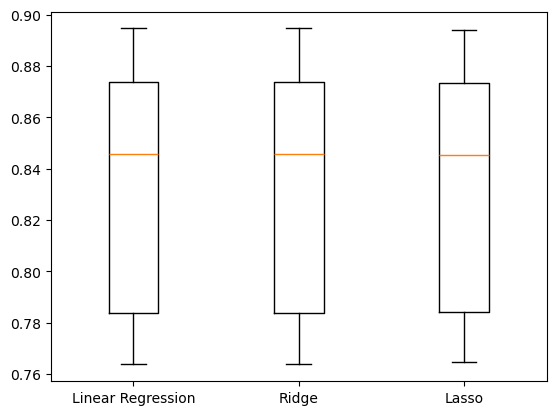

In [72]:
models = {"Linear Regression": LinearRegression(), "Ridge": Ridge(alpha=0.1), "Lasso": Lasso(alpha=0.1)}
results = []

for model in models.values():
  kf = KFold(n_splits=6, random_state=42, shuffle=True)
  cv_scores = cross_val_score(model, X_train, y_train, cv=kf)
  results.append(cv_scores)
plt.boxplot(results, labels=models.keys())
plt.show()